![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
dodge colt m/m,33.5,4,98.0,83.0,2075,15.9,77,usa
oldsmobile starfire sx,23.8,4,151.0,85.0,2855,17.6,78,usa
ford pinto,23.0,4,140.0,83.0,2639,17.0,75,usa
oldsmobile cutlass ls,26.6,8,350.0,105.0,3725,19.0,81,usa
ford granada ghia,18.0,6,250.0,78.0,3574,21.0,76,usa


## Feature Selection

- Select 2 columns for the modelling

In [2]:
df_mpg1 = df_mpg.iloc[:,-4:-2]
df_mpg1

,weight,acceleration
name,,
chevrolet chevelle malibu,3504,12.0
buick skylark 320,3693,11.5
plymouth satellite,3436,11.0
amc rebel sst,3433,12.0
ford torino,3449,10.5
...,...,...
ford mustang gl,2790,15.6
vw pickup,2130,24.6
dodge rampage,2295,11.6


## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [3]:
import pandas as pd

## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [5]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters= 3)
model_km.fit(X = df_mpg1)

KMeans(n_clusters=3)

### Calculate Predictions

In [6]:
model_km.predict(X=df_mpg1)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

### Create a New DataFrame for the Predictions

In [7]:
df_pred = df_mpg1.copy()
df_pred['pred_km'] = model_km.predict(X=df_mpg1)
df_pred

,weight,acceleration,pred_km
name,,,
chevrolet chevelle malibu,3504,12.0,2
buick skylark 320,3693,11.5,2
plymouth satellite,3436,11.0,2
amc rebel sst,3433,12.0,2
ford torino,3449,10.5,2
...,...,...,...
ford mustang gl,2790,15.6,2
vw pickup,2130,24.6,0
dodge rampage,2295,11.6,0


### Visualize the Model

- You colour the points with the the value of the predictions

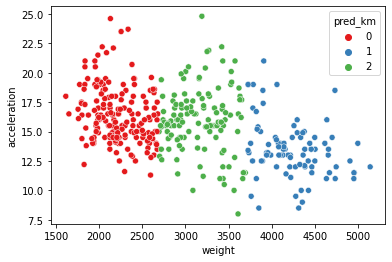

In [8]:
sns.scatterplot(x='weight', y='acceleration', hue='pred_km',
                palette='Set1', data=df_pred);


### Scaling the data

In [9]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_mpg1)
data = scaler.transform(df_mpg1)
data[:5]


array([[0.5361497 , 0.23809524],
       [0.58973632, 0.20833333],
       [0.51686986, 0.17857143],
       [0.51601928, 0.23809524],
       [0.52055571, 0.14880952]])

In [10]:
df_scaled = pd.DataFrame(data, columns=df_mpg1.columns, index=df_mpg1.index)
df_scaled


,weight,acceleration
name,,
chevrolet chevelle malibu,0.536150,0.238095
buick skylark 320,0.589736,0.208333
plymouth satellite,0.516870,0.178571
amc rebel sst,0.516019,0.238095
ford torino,0.520556,0.148810
...,...,...
ford mustang gl,0.333711,0.452381
vw pickup,0.146583,0.988095
dodge rampage,0.193365,0.214286


In [11]:
model_km.fit(X=df_scaled)
model_km.predict(df_scaled)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2,

In [12]:
df_pred_scaled = df_scaled.copy()
df_pred_scaled['pred_km'] = model_km.predict(df_scaled)
df_pred_scaled

,weight,acceleration,pred_km
name,,,
chevrolet chevelle malibu,0.536150,0.238095,0
buick skylark 320,0.589736,0.208333,0
plymouth satellite,0.516870,0.178571,0
amc rebel sst,0.516019,0.238095,0
ford torino,0.520556,0.148810,0
...,...,...,...
ford mustang gl,0.333711,0.452381,1
vw pickup,0.146583,0.988095,1
dodge rampage,0.193365,0.214286,1


## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [13]:
from sklearn.cluster import SpectralClustering
model_sc = SpectralClustering(n_clusters= 3)
model_sc.fit(X=df_scaled)

SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [14]:
model_sc.fit_predict(df_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,

#### Create a New DataFrame for the Predictions

In [15]:
df_pred_scaled['pred_sc'] = model_sc.fit_predict(X=df_scaled)
df_pred_scaled

,weight,acceleration,pred_km,pred_sc
name,,,,
chevrolet chevelle malibu,0.536150,0.238095,0,0
buick skylark 320,0.589736,0.208333,0,0
plymouth satellite,0.516870,0.178571,0,0
amc rebel sst,0.516019,0.238095,0,0
ford torino,0.520556,0.148810,0,0
...,...,...,...,...
ford mustang gl,0.333711,0.452381,1,1
vw pickup,0.146583,0.988095,1,2
dodge rampage,0.193365,0.214286,1,1


#### Visualize the Model

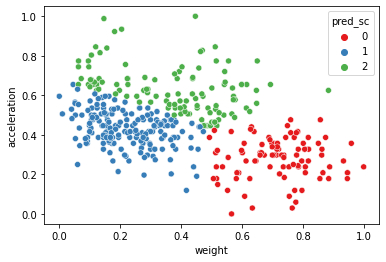

In [16]:
sns.scatterplot(x='weight', y='acceleration', hue='pred_sc',
                palette='Set1', data=df_pred_scaled);


### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [17]:
from sklearn.cluster import MeanShift
model_ms= MeanShift()
model_ms.fit(df_scaled)

MeanShift()

#### Calculate Predictions

In [18]:
model_ms.fit_predict(df_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,

#### Create a New DataFrame for the Predictions

In [19]:
df_pred_scaled['pred_ms'] = model_ms.fit_predict(df_scaled)
df_pred_scaled

,weight,acceleration,pred_km,pred_sc,pred_ms
name,,,,,
chevrolet chevelle malibu,0.536150,0.238095,0,0,1
buick skylark 320,0.589736,0.208333,0,0,1
plymouth satellite,0.516870,0.178571,0,0,1
amc rebel sst,0.516019,0.238095,0,0,1
ford torino,0.520556,0.148810,0,0,1
...,...,...,...,...,...
ford mustang gl,0.333711,0.452381,1,1,0
vw pickup,0.146583,0.988095,1,2,0
dodge rampage,0.193365,0.214286,1,1,0


#### Visualize the Model

In [20]:
import matplotlib.pyplot as plt

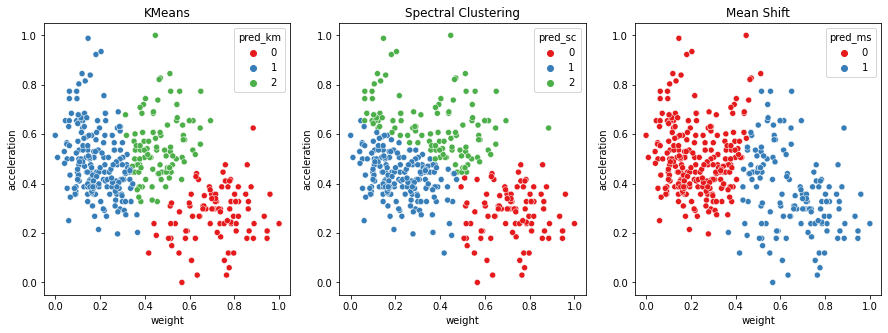

In [21]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='weight', y='acceleration', hue='pred_km',
                data=df_pred_scaled, palette='Set1', ax=ax1);

ax2.set_title('Spectral Clustering')
sns.scatterplot(x='weight', y='acceleration', hue='pred_sc',
                data=df_pred_scaled, palette='Set1', ax=ax2);

ax3.set_title('Mean Shift')
sns.scatterplot(x='weight', y='acceleration', hue='pred_ms',
                data=df_pred_scaled, palette='Set1', ax=ax3);


## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.